In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people
from sklearn.linear_model import LogisticRegression

In [2]:
olive = fetch_olivetti_faces()
lfw = fetch_lfw_people(min_faces_per_person=25, color=True)

In [7]:
type(olive), type(lfw)

(sklearn.utils._bunch.Bunch, sklearn.utils._bunch.Bunch)

In [12]:
olive.data.shape

(400, 4096)

In [15]:
first_face = olive.data[0]

In [21]:
first_face.shape

(4096,)

In [23]:
first_face.reshape(64,64).shape

(64, 64)

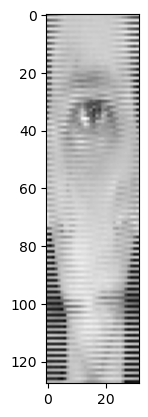

In [24]:
plt.imshow(first_face.reshape(128,32), cmap='gray')

In [26]:
olive.data.shape

(400, 4096)

In [30]:
first_lfw = lfw.data[0]

In [31]:
first_lfw.shape

(8742,)

In [33]:
print(lfw.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [36]:
first_lfw.reshape(62,47,3)

array([[[0.16862746, 0.14509805, 0.14509805],
        [0.2       , 0.18039216, 0.2       ],
        [0.22352941, 0.1882353 , 0.19607843],
        ...,
        [0.41568628, 0.2509804 , 0.24313726],
        [0.27450982, 0.16862746, 0.14117648],
        [0.19215687, 0.14117648, 0.10588235]],

       [[0.18431373, 0.16470589, 0.15294118],
        [0.23137255, 0.20392157, 0.21176471],
        [0.2627451 , 0.21176471, 0.20784314],
        ...,
        [0.4627451 , 0.28627452, 0.27058825],
        [0.32941177, 0.21176471, 0.1882353 ],
        [0.22745098, 0.16470589, 0.14117648]],

       [[0.21176471, 0.1882353 , 0.16470589],
        [0.2627451 , 0.22352941, 0.21176471],
        [0.31764707, 0.2509804 , 0.23529412],
        ...,
        [0.5019608 , 0.30980393, 0.2901961 ],
        [0.38431373, 0.2509804 , 0.22352941],
        [0.27058825, 0.1882353 , 0.16470589]],

       ...,

       [[0.57254905, 0.6509804 , 0.7294118 ],
        [0.73333335, 0.8392157 , 0.93333334],
        [0.7411765 , 0

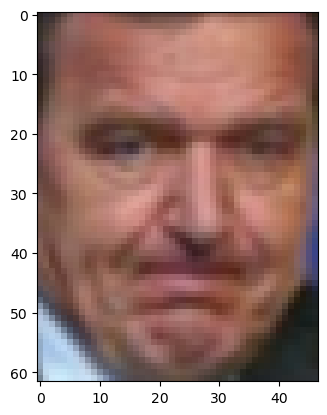

In [37]:
plt.imshow(first_lfw.reshape(62,47,3))

In [38]:
62 * 47 * 3

8742

In [40]:
lfw.data.shape

(2588, 8742)

In [41]:
clf = LogisticRegression()

In [42]:
X = lfw.data
y = lfw.target

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [46]:
clf.fit(X_train, y_train)

/Users/josephpeart/opt/anaconda3/envs/bcenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = clf.predict(X_test)

In [48]:
import sklearn.metrics as m

<Axes: >

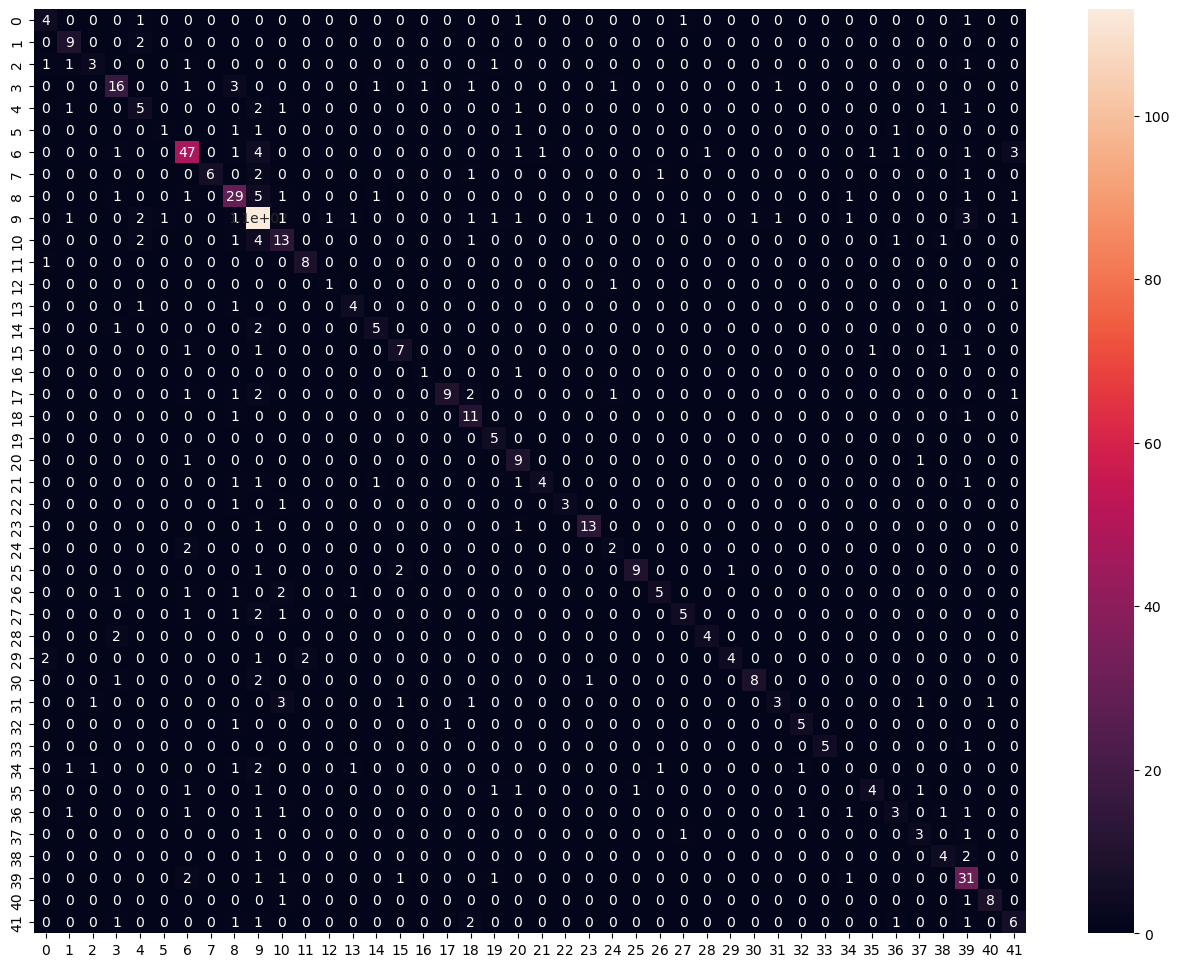

In [57]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,12))

sns.heatmap(m.confusion_matrix(y_test, y_pred), annot=True, ax=ax)

In [59]:
print(m.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.82      0.64      0.72        14
           2       0.38      0.60      0.46         5
           3       0.64      0.67      0.65        24
           4       0.42      0.38      0.40        13
           5       0.20      0.50      0.29         2
           6       0.76      0.77      0.76        61
           7       0.55      1.00      0.71         6
           8       0.71      0.63      0.67        46
           9       0.85      0.74      0.79       152
          10       0.57      0.50      0.53        26
          11       0.89      0.80      0.84        10
          12       0.33      0.50      0.40         2
          13       0.57      0.57      0.57         7
          14       0.62      0.62      0.62         8
          15       0.58      0.64      0.61        11
          16       0.50      0.50      0.50         2
          17       0.53    

In [4]:
lfw.data.shape

(2588, 8742)

In [10]:
thirty_four = lfw.data[lfw.target == 34]

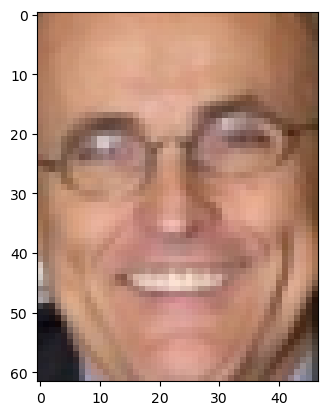

In [11]:
plt.imshow(thirty_four[0].reshape(62,47,3))

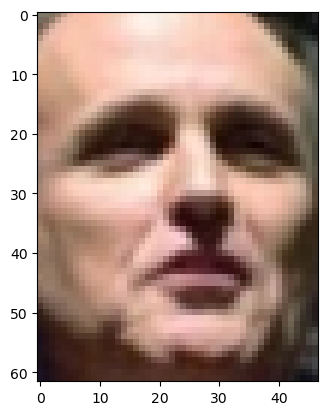

In [23]:
plt.imshow(thirty_four[13].reshape(62,47,3))
